# Config

In [1]:
'''
Standard Configuration:
    
    - use_gpu: (Bool) If False, training on CPU
                
    - num_classes: (Int) Number of classes on 
                dataset + 1 (Class 0 represents 
                backround)
                
    - test_batch_size: (Int) Batch size used
                while evaluating over test_set
                
    - dataset_path: Annotations file directory path. 
    
                Directory must contain files:
                
                  File Name:                File Column Data:
                    - 'test.txt':               (String) Path
                    - 'test_bbox.txt':          (Int, Int, Int, Int) X1, Y1, X2, Y2
                    - 'test_cate.txt':          (Int) Class
                    - 'train.txt':              (String) Path
                    - 'train_bbox.txt':         (Int, Int, Int, Int) X1, Y1, X2, Y2
                    - 'train_cate.txt':         (Int) Class
                    - 'val.txt':                (String) Path
                    - 'val_bbox.txt':           (Int, Int, Int, Int) X1, Y1, X2, Y2 
                    - 'val_cate.txt':           (Int) Class
                
    - load_model: (String) Saved model path. 
                Locates the model to evaluate.
'''

use_gpu = True

num_classes = 50

test_batch_size = 16

dataset_path = '../data/Annotations/'

load_model = './checkpoints/retinanet_base_8.pt'

# Dataset

In [2]:
from utils import dataset

In [3]:
test_set = dataset.ClothingDataset(dataset_path, train='test')
#test_set.imgs.drop(test_set.imgs[test_set.imgs['class']!=15].index, inplace=True)
#test_set.imgs.reset_index(drop=True, inplace=True)

Dropped 175 images with box area 0


In [4]:
len(test_set.imgs)

3825

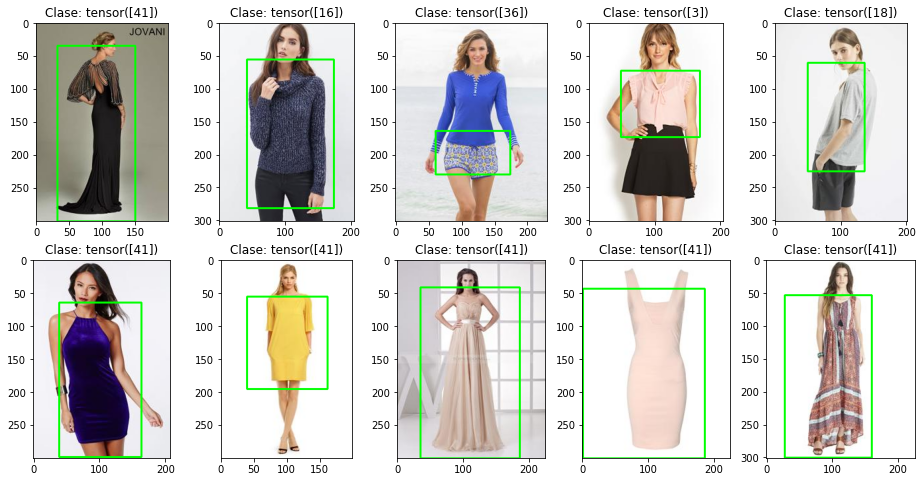

In [5]:
test_set.plot()

# Evaluate

In [6]:
import torch
import numpy as np
import matplotlib.pyplot as plt

from utils import trainer, evaluator

In [7]:
model = torch.load(load_model)

In [8]:
'''
Evaluator Builder

    Creates an Evaluator Object with the given model and parameters.
    
    An Evaluator Object is a simple implementation of NN evaluator for
    object detection. It implements the ability plot real and predicted 
    class and box values. It also allows to calculate the classification
    accuracy and the mean box IoU.
'''

evaluate = evaluator.Evaluator(model, test_set, n_classes=num_classes, batch_size=test_batch_size, use_gpu=use_gpu)

/home/delas/.local/lib/python3.8/site-packages/torch/functional.py:445: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ../aten/src/ATen/native/TensorShape.cpp:2157.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


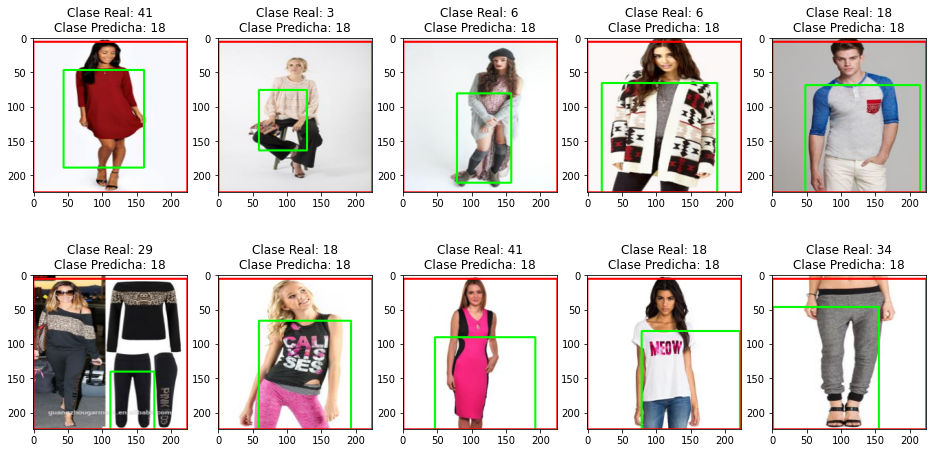

In [9]:
'''
Show 10 images with their real and 
predicted values.
'''

evaluate.plot()

In [10]:
'''
Run over test_set to obtain the
classification accuracy and mean 
box IoU.
'''

evaluate.evaluate()

Evaluating model...
BATCH 1 FINISHED IN	00:00s (231ms)	 ETA: 00:55s
BATCH 2 FINISHED IN	00:00s (226ms)	 ETA: 00:54s
BATCH 3 FINISHED IN	00:00s (231ms)	 ETA: 00:54s
BATCH 4 FINISHED IN	00:00s (236ms)	 ETA: 00:54s
BATCH 5 FINISHED IN	00:00s (229ms)	 ETA: 00:54s
BATCH 6 FINISHED IN	00:00s (227ms)	 ETA: 00:53s
BATCH 7 FINISHED IN	00:00s (227ms)	 ETA: 00:53s
BATCH 8 FINISHED IN	00:00s (227ms)	 ETA: 00:53s
BATCH 9 FINISHED IN	00:00s (226ms)	 ETA: 00:53s
BATCH 10 FINISHED IN	00:00s (227ms)	 ETA: 00:52s
BATCH 11 FINISHED IN	00:00s (227ms)	 ETA: 00:52s
BATCH 12 FINISHED IN	00:00s (227ms)	 ETA: 00:52s
BATCH 13 FINISHED IN	00:00s (227ms)	 ETA: 00:52s
BATCH 14 FINISHED IN	00:00s (227ms)	 ETA: 00:52s
BATCH 15 FINISHED IN	00:00s (227ms)	 ETA: 00:51s
BATCH 16 FINISHED IN	00:00s (227ms)	 ETA: 00:51s
BATCH 17 FINISHED IN	00:00s (228ms)	 ETA: 00:51s
BATCH 18 FINISHED IN	00:00s (226ms)	 ETA: 00:51s
BATCH 19 FINISHED IN	00:00s (227ms)	 ETA: 00:50s
BATCH 20 FINISHED IN	00:00s (227ms)	 ETA: 00:50s
BATCH 21 

BATCH 167 FINISHED IN	00:00s (227ms)	 ETA: 00:16s
BATCH 168 FINISHED IN	00:00s (227ms)	 ETA: 00:16s
BATCH 169 FINISHED IN	00:00s (227ms)	 ETA: 00:16s
BATCH 170 FINISHED IN	00:00s (227ms)	 ETA: 00:15s
BATCH 171 FINISHED IN	00:00s (227ms)	 ETA: 00:15s
BATCH 172 FINISHED IN	00:00s (227ms)	 ETA: 00:15s
BATCH 173 FINISHED IN	00:00s (227ms)	 ETA: 00:15s
BATCH 174 FINISHED IN	00:00s (227ms)	 ETA: 00:15s
BATCH 175 FINISHED IN	00:00s (227ms)	 ETA: 00:14s
BATCH 176 FINISHED IN	00:00s (227ms)	 ETA: 00:14s
BATCH 177 FINISHED IN	00:00s (226ms)	 ETA: 00:14s
BATCH 178 FINISHED IN	00:00s (227ms)	 ETA: 00:14s
BATCH 179 FINISHED IN	00:00s (227ms)	 ETA: 00:13s
BATCH 180 FINISHED IN	00:00s (227ms)	 ETA: 00:13s
BATCH 181 FINISHED IN	00:00s (227ms)	 ETA: 00:13s
BATCH 182 FINISHED IN	00:00s (227ms)	 ETA: 00:13s
BATCH 183 FINISHED IN	00:00s (226ms)	 ETA: 00:12s
BATCH 184 FINISHED IN	00:00s (227ms)	 ETA: 00:12s
BATCH 185 FINISHED IN	00:00s (227ms)	 ETA: 00:12s
BATCH 186 FINISHED IN	00:00s (227ms)	 ETA: 00:12s


(tensor(0.1116, device='cuda:0'), tensor(-0.1941, device='cuda:0'))